# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from scipy.stats import pearsonr


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
#units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
 # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ['coord']['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity = city_weather ['main']['humidity']
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather ['wind']['speed']
        city_country = city_weather ['sys']['country']
        city_date = datetime.datetime.fromtimestamp(city_weather['dt'])

        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp
                          ,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
      

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ulladulla
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | makassar
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | anabar
City not found. Skipping...
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | champerico
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | san antonio de pale
Processing Record 22 

Processing Record 38 of Set 4 | baotou
Processing Record 39 of Set 4 | khamis mushait
Processing Record 40 of Set 4 | argo
Processing Record 41 of Set 4 | san patricio
Processing Record 42 of Set 4 | karamay
City not found. Skipping...
Processing Record 43 of Set 4 | jabor
Processing Record 44 of Set 4 | polyarnyy
Processing Record 45 of Set 4 | qacha's nek
Processing Record 46 of Set 4 | nantai
Processing Record 47 of Set 4 | morehead city
Processing Record 48 of Set 4 | guisa
Processing Record 49 of Set 4 | tazovsky
Processing Record 0 of Set 5 | takoradi
Processing Record 1 of Set 5 | port mathurin
Processing Record 2 of Set 5 | dubai
Processing Record 3 of Set 5 | neiafu
Processing Record 4 of Set 5 | udachny
Processing Record 5 of Set 5 | harstad
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | al ghayzah
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | alto parana
Processing Record 10 of Set 5 | dryden
Processing Record 11 of Set 5 | 

Processing Record 28 of Set 8 | pathein
Processing Record 29 of Set 8 | khanty-mansiysk
Processing Record 30 of Set 8 | nalut
Processing Record 31 of Set 8 | puerto madryn
Processing Record 32 of Set 8 | chiredzi
Processing Record 33 of Set 8 | happy valley-goose bay
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | karkira
Processing Record 36 of Set 8 | saint-francois
Processing Record 37 of Set 8 | ondjiva
Processing Record 38 of Set 8 | colares
Processing Record 39 of Set 8 | santa elena de uairen
Processing Record 40 of Set 8 | batticaloa
Processing Record 41 of Set 8 | aldinga beach
Processing Record 42 of Set 8 | wuyishan
Processing Record 43 of Set 8 | kyzyl-suu
Processing Record 44 of Set 8 | sept-iles
Processing Record 45 of Set 8 | emerald
Processing Record 46 of Set 8 | kapa'a
Processing Record 47 of Set 8 | gejiu
Processing Record 48 of Set 8 | manacapuru
Processing Record 49 of Set 8 | chulakkurgan
Processing Record 0 of Set 9 | novyy urengoy
Processi

Processing Record 17 of Set 12 | aden
Processing Record 18 of Set 12 | salihorsk
Processing Record 19 of Set 12 | pangkalanbuun
Processing Record 20 of Set 12 | igarka
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ulladulla,-35.3500,150.4667,30.43,33,100,1.51,AU,2023-10-30 01:12:41
1,college,64.8569,-147.8028,-3.03,87,75,0.00,US,2023-10-30 01:07:10
2,port elizabeth,-33.9180,25.5701,14.06,79,40,3.09,ZA,2023-10-30 01:04:51
3,bethel,41.3712,-73.4140,10.20,89,100,2.57,US,2023-10-30 01:06:42
4,adamstown,-25.0660,-130.1015,22.68,82,100,4.12,PN,2023-10-30 01:06:36


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulladulla,-35.3500,150.4667,30.43,33,100,1.51,AU,2023-10-30 01:12:41
1,college,64.8569,-147.8028,-3.03,87,75,0.00,US,2023-10-30 01:07:10
2,port elizabeth,-33.9180,25.5701,14.06,79,40,3.09,ZA,2023-10-30 01:04:51
3,bethel,41.3712,-73.4140,10.20,89,100,2.57,US,2023-10-30 01:06:42
4,adamstown,-25.0660,-130.1015,22.68,82,100,4.12,PN,2023-10-30 01:06:36


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

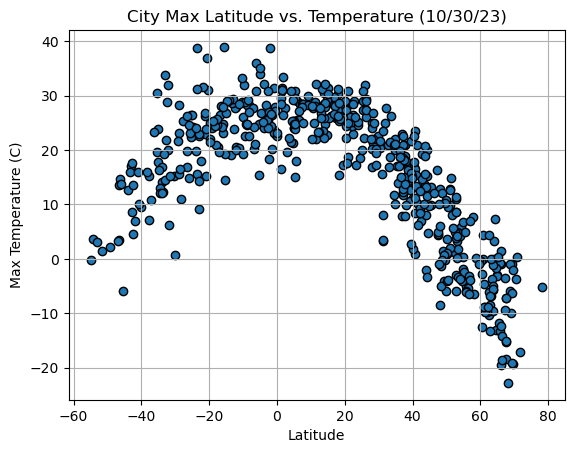

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidths=1)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (%s)' % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

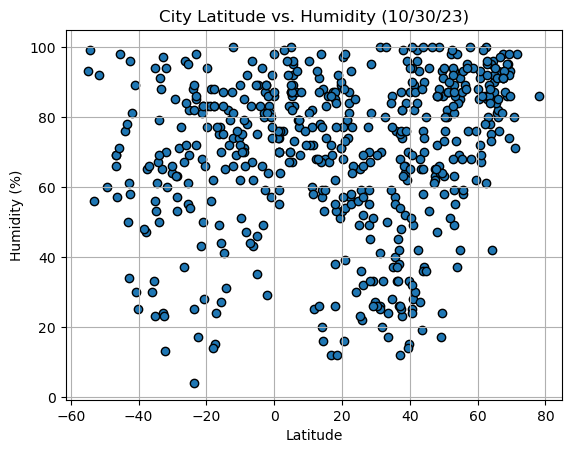

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidths=1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%s)' % time.strftime("%x"))
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

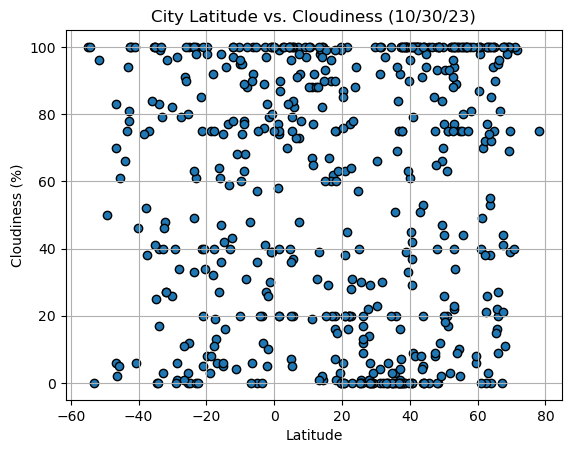

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidths=1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

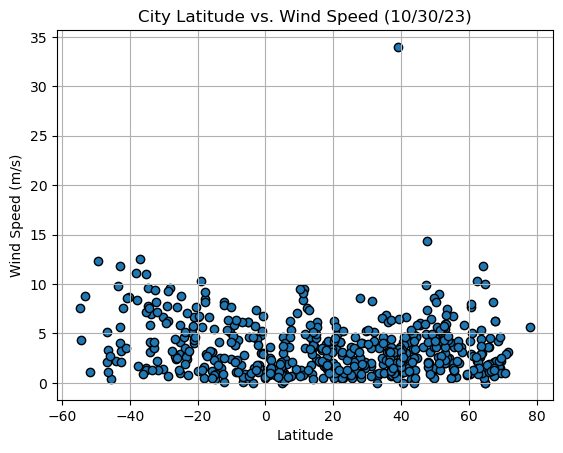

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidths=1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]



def plot_linear_regress(x, y):
    r_value,_ = pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
  
    plt.scatter(x, y)
    plt.plot(x, regress_values, '-r')
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")







In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,-3.03,87,75,0.00,US,2023-10-30 01:07:10
3,bethel,41.3712,-73.4140,10.20,89,100,2.57,US,2023-10-30 01:06:42
7,albany,42.6001,-73.9662,7.02,93,100,1.10,US,2023-10-30 01:06:45
8,lata,40.1629,-8.3327,11.15,87,61,1.04,PT,2023-10-30 01:08:27
11,champerico,14.3000,-91.9167,24.85,88,100,3.60,GT,2023-10-30 01:12:45


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulladulla,-35.3500,150.4667,30.43,33,100,1.51,AU,2023-10-30 01:12:41
2,port elizabeth,-33.9180,25.5701,14.06,79,40,3.09,ZA,2023-10-30 01:04:51
4,adamstown,-25.0660,-130.1015,22.68,82,100,4.12,PN,2023-10-30 01:06:36
5,blackmans bay,-43.0167,147.3167,17.07,50,94,5.63,AU,2023-10-30 01:06:53
6,makassar,-5.1400,119.4221,34.03,46,0,6.17,ID,2023-10-30 01:03:19


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.888907303813988


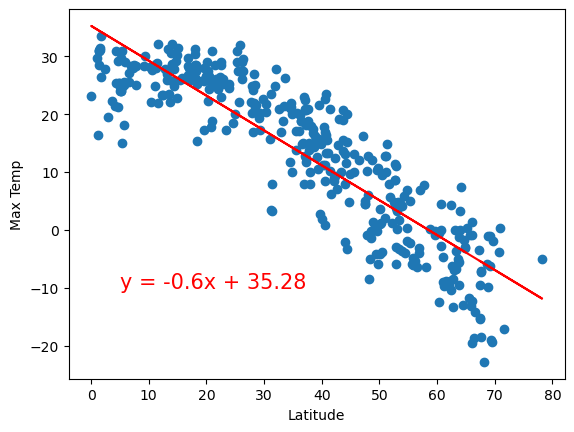

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemisphere['Lat']
y = northern_hemisphere['Max Temp']
a = 5
b = -10

plot_linear_regress(x, y)
plt.xlabel ('Latitude')
plt.ylabel('Max Temp')
plt.show()


The r-value is: 0.6821937521614485


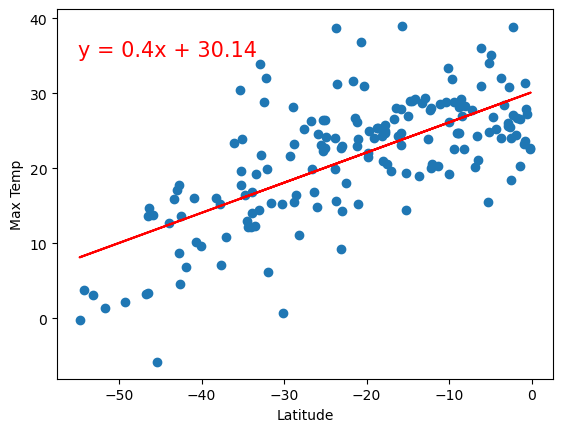

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemisphere['Lat']
y = southern_hemisphere['Max Temp']
a = -55
b = 35

plot_linear_regress(x, y)
plt.xlabel ('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** 
Linear regression on Northern Hemisphere shows that there is a strong negative correlation between latitude and temperature in the Northern Hemisphere. As you move farther north from the equator, temperatures tend to decrease.
Linear regression on Southern Hemisphere tells you that there is a moderate, positive linear relationship between latitude and maximum temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

In [17]:
# Northern Hemisphere
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]



def plot_linear_regress(x, y):
    r_value,_ = pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
  
    plt.scatter(x, y)
    plt.plot(x, regress_values, '-r')
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")







The r-value is: 0.13033305983728813


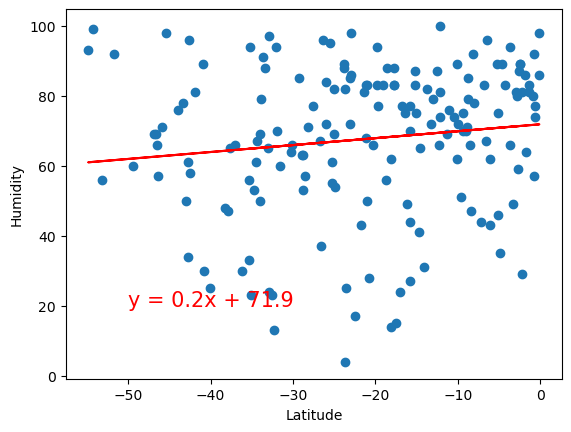

In [18]:
# Southern Hemisphere
x = southern_hemisphere['Lat']
y = southern_hemisphere['Humidity']
a = -50
b = 20

plot_linear_regress(x, y)
plt.xlabel ('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** 
On Northern Hemisphere you can say there is a weak positive linear relationship between latitude and humidity in the Northern Hemisphere. This relationship implies that as you move northward from the equator, humidity tends to slightly increase.
On Southern Hemisphere, the calculated r-value is approximately 0.1483. This value indicates a relatively weak positive correlation between latitude and humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05217223476290555


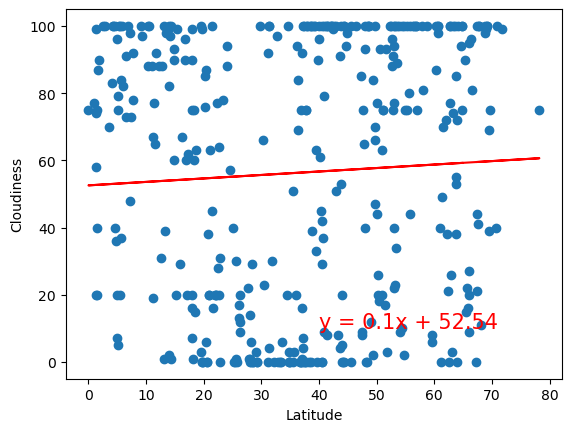

In [19]:
# Northern Hemisphere
x = northern_hemisphere['Lat']
y = northern_hemisphere['Cloudiness']
a = 40
b = 10

plot_linear_regress(x, y)
plt.xlabel ('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: -0.0014911404894692834


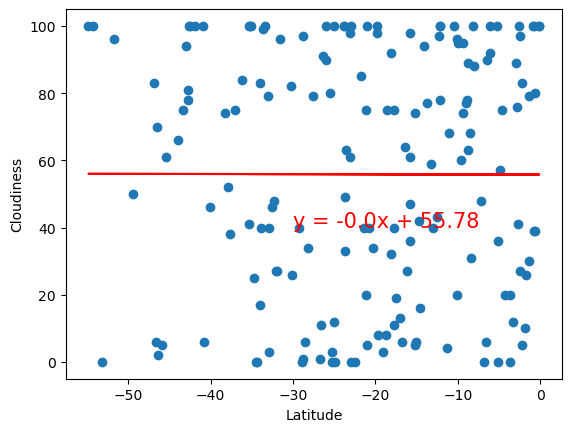

In [20]:
# Southern Hemisphere
x = southern_hemisphere['Lat']
y = southern_hemisphere['Cloudiness']
a = -30
b = 40

plot_linear_regress(x, y)
plt.xlabel ('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:**
For the Northern Hemisphere, the relatively low r-value indicates that latitude alone may not be a strong predictor of cloudiness, and other factors likely play a significant role in influencing cloud cover in different locations in the Northern Hemisphere.
In the case of Southern Hemisphere, with an r-value of approximately -0.0748, it suggests a very weak negative linear relationship between latitude and cloudiness.The negative sign of the r-value indicates a negative correlation, but it is so weak that it is not practically significant.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08780198904079799


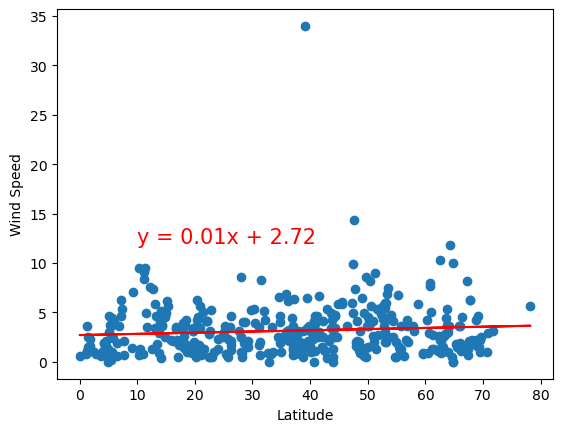

In [21]:
# Northern Hemisphere
x = northern_hemisphere ['Lat']
y = northern_hemisphere ['Wind Speed']
a = 10
b = 12

plot_linear_regress(x, y)
plt.xlabel ('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.30832110308156846


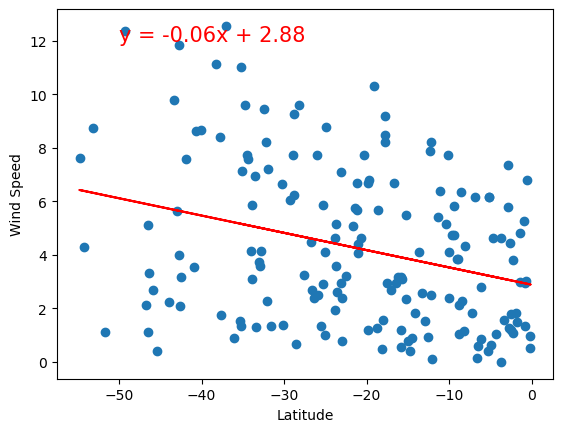

In [22]:
# Southern Hemisphere
x = southern_hemisphere ['Lat']
y = southern_hemisphere ['Wind Speed']
a = -50
b = 12

plot_linear_regress(x, y)
plt.xlabel ('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:**
Northern Hemisphere,with an r-value of approximately 0.0642, it suggests a very weak positive linear relationship between latitude and wind speed.
The Southern Hemisphere, with an r-value of approximately -0.3139 suggests a moderately weak negative linear relationship between latitude and wind speed. This correlation, while not very strong, is more noticeable compared to the analyses in the Northern Hemisphere.